In [ ]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import train
import importlib
import utils
import visual_tools as vt
import torchvision.transforms.functional as FT
train = importlib.reload(train)
utils = importlib.reload(utils)
vt = importlib.reload(vt)

In [ ]:
def loaders():
    traintransform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize(128),
                                         transforms.RandomHorizontalFlip(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testtransform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Resize(128),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 32
    num_workers = 2

    trainset = datasets.CIFAR10("/data/cifar10/train", train=True, transform=traintransform, download=True)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    testset = datasets.CIFAR10("/data/cifar10/test", train=False, transform=testtransform, download=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    return trainloader, testloader

Extracting /data/cifar10/train/cifar-10-python.tar.gz to /data/cifar10/train


Extracting /data/cifar10/test/cifar-10-python.tar.gz to /data/cifar10/test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


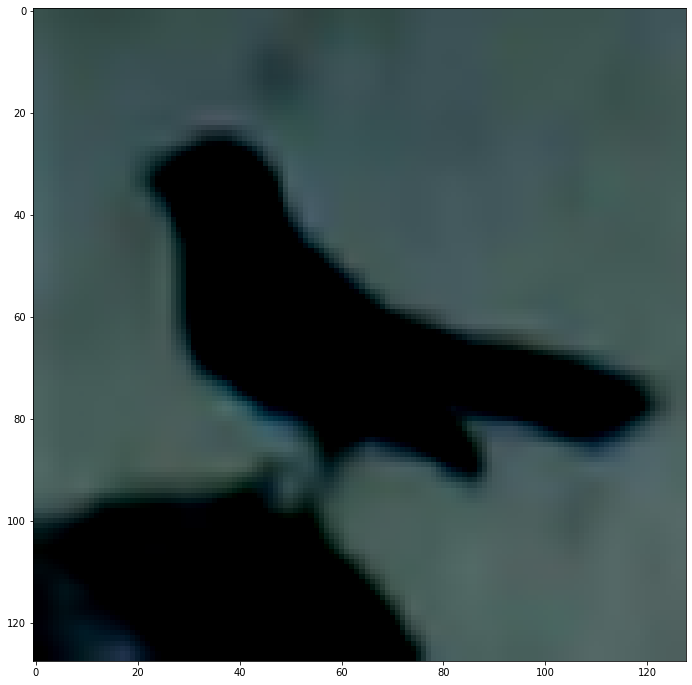

In [ ]:
trainloader, _ = loaders()
images, labels = next(iter(trainloader))
vt.show_image(images[2])

In [ ]:
body = models.alexnet(pretrained=True).features 
body.requires_grad_(False) # True is fully trained
body[10].requires_grad_(False) # False if only head is trained
s = body(images).shape
s = s[1] * s[2] * s[3]
print(s)
head = nn.Sequential(nn.Flatten(),
                     nn.Linear(s, 500),
                     nn.ReLU(),
                     nn.Linear(500, 10))
head.requires_grad_(True) # Always true
model = nn.Sequential(body, head)
print(model)

training = train.Training()
assert len(training.test_losses) == 0 # Jupyter notebook runtime acts weird, so it won't always create a new instance

2304
Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=500, bias=True)
    (2): ReLU()
    (3): Linear(in_features=500, out_featu

In [ ]:
training.train(model=model,
               loaders=loaders,
               optimizer=optim.Adam(params=model.parameters(), lr=0.001),
               epochs=6,
               reload_=True)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Validation loss: 2.354
The accuracy is: 8.5%
Training loss: 0.71
Files already downloaded and verified
Files already downloaded and verified
New epoch: 1
Validation loss: 0.69
The accuracy is: 75.9%
Training loss: 0.546
Files already downloaded and verified
Files already downloaded and verified
New epoch: 2
Validation loss: 0.61
The accuracy is: 78.7%
Training loss: 0.474
Files already downloaded and verified
Files already downloaded and verified
New epoch: 3
Validation loss: 0.554
The accuracy is: 81.4%
Training loss: 0.425
Files already downloaded and verified
Files already downloaded and verified
New epoch: 4
Validation loss: 0.581
The accuracy is: 80.9%
Training loss: 0.376
Files already downloaded and verified
Files already downloaded and verified
New epoch: 5
Validation loss: 0.612
The accuracy is: 80.4%
Training loss: 0.339
Files already downloaded and verified
Files alrea

In [ ]:
images1024 = torch.load("images1024.tensor")
labels1024 = torch.load("labels1024.tensor")
images1024 = FT.resize(images1024, 128)
images1024.shape

torch.Size([1024, 3, 128, 128])

Looking at the features of the output of layer:  Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


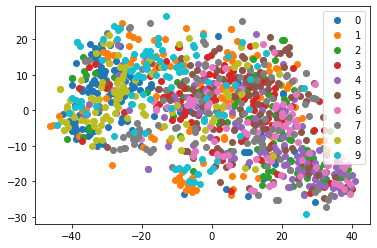

Looking at the features of the output of layer:  Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))


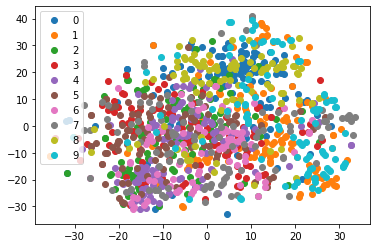

Looking at the features of the output of layer:  Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


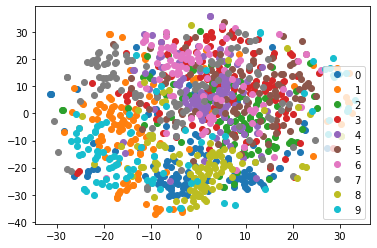

Looking at the features of the output of layer:  Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


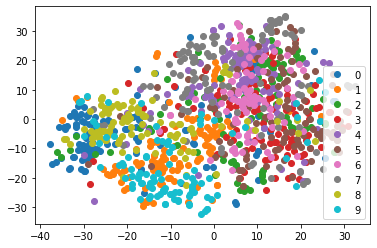

Looking at the features of the output of layer:  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


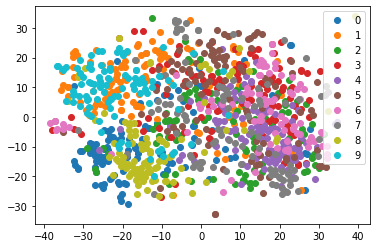

Looking at the features of the output of layer:  Linear(in_features=2304, out_features=500, bias=True)


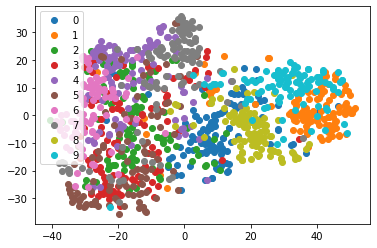

Looking at the features of the output of layer:  Linear(in_features=500, out_features=10, bias=True)


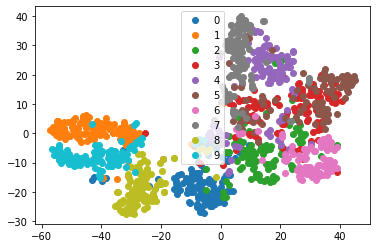

In [ ]:
vt.show_feature_projection(model.cpu(), images1024, labels1024)